In [37]:
import pandas as pd
import sklearn
X = pd.read_csv("interstate.csv")
targets = X['outcome'].value_counts().keys().tolist()
for i in range (len(targets)):
    targets[i] = str(targets[i])
features = list(X)

In [38]:
y = X.pop("outcome").values

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [40]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

featureSet = ['side', 'initiation','combat_location','combat_fatalities']

X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

ohe.fit(X_train_sf)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=False)

In [41]:
X_train_sf_encoded = ohe.transform(X_train_sf)
X_test_sf_encoded = ohe.transform(X_test_sf)

In [42]:
from sklearn.linear_model import LogisticRegression
import datetime
clf_lr = LogisticRegression(solver='lbfgs', multi_class="multinomial", max_iter=1000, random_state=1)

In [43]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(random_state=1, max_depth=None)

In [44]:
def train_model(clf, X_train, y_train, epochs=1):
    scores = []
    print("Starting training...")
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs) + " -- " + str(datetime.datetime.now()))
        clf.fit(X_train, y_train)
        score = clf.score(X_train, y_train)
        scores.append(score)
    print("Done training.")
    return scores

In [45]:
clf_lr_scores = train_model(clf_lr, X_train_sf_encoded, y_train)
print(clf_lr_scores)

Starting training...
Epoch:1/1 -- 2019-12-02 21:57:24.374821
Done training.
[0.873015873015873]


In [46]:
clf_lr_test_scores = train_model(clf_lr, X_test_sf_encoded, y_test)
print(clf_lr_test_scores)

Starting training...
Epoch:1/1 -- 2019-12-02 21:57:24.412721
Done training.
[0.8470588235294118]


In [47]:
#tree.plot_tree(clf_dt.fit(X_train_sf_encoded, y_train))
clf_dt_scores = train_model(clf_dt, X_train_sf_encoded, y_train)
print(clf_dt_scores)

Starting training...
Epoch:1/1 -- 2019-12-02 21:57:24.428534
Done training.
[0.9801587301587301]


In [59]:
y_predicted = clf_dt.predict(X_train_sf_encoded[0:10])
print(y_predicted)
print(y_train[0:10])
clf_dt.predict_proba(X_train_sf_encoded[0:10])

[2 2 2 1 1 1 2 1 1 1]
[2 4 2 1 1 1 2 6 1 1]


array([[0. , 1. , 0. , 0. ],
       [0. , 1. , 0. , 0. ],
       [0. , 0.5, 0.5, 0. ],
       [1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. ],
       [0.5, 0. , 0. , 0.5],
       [1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. ]])

Starting training...
Epoch:1/1 -- 2019-12-02 21:57:24.538265
Done training.
[0.9529411764705882]


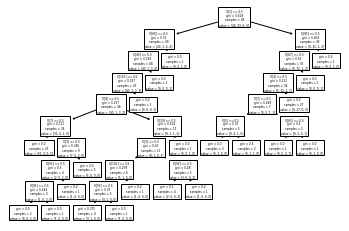

In [49]:
tree.plot_tree(clf_dt.fit(X_test_sf_encoded, y_test))
clf_dt_test_scores = train_model(clf_dt, X_test_sf_encoded, y_test)
print(clf_dt_test_scores)

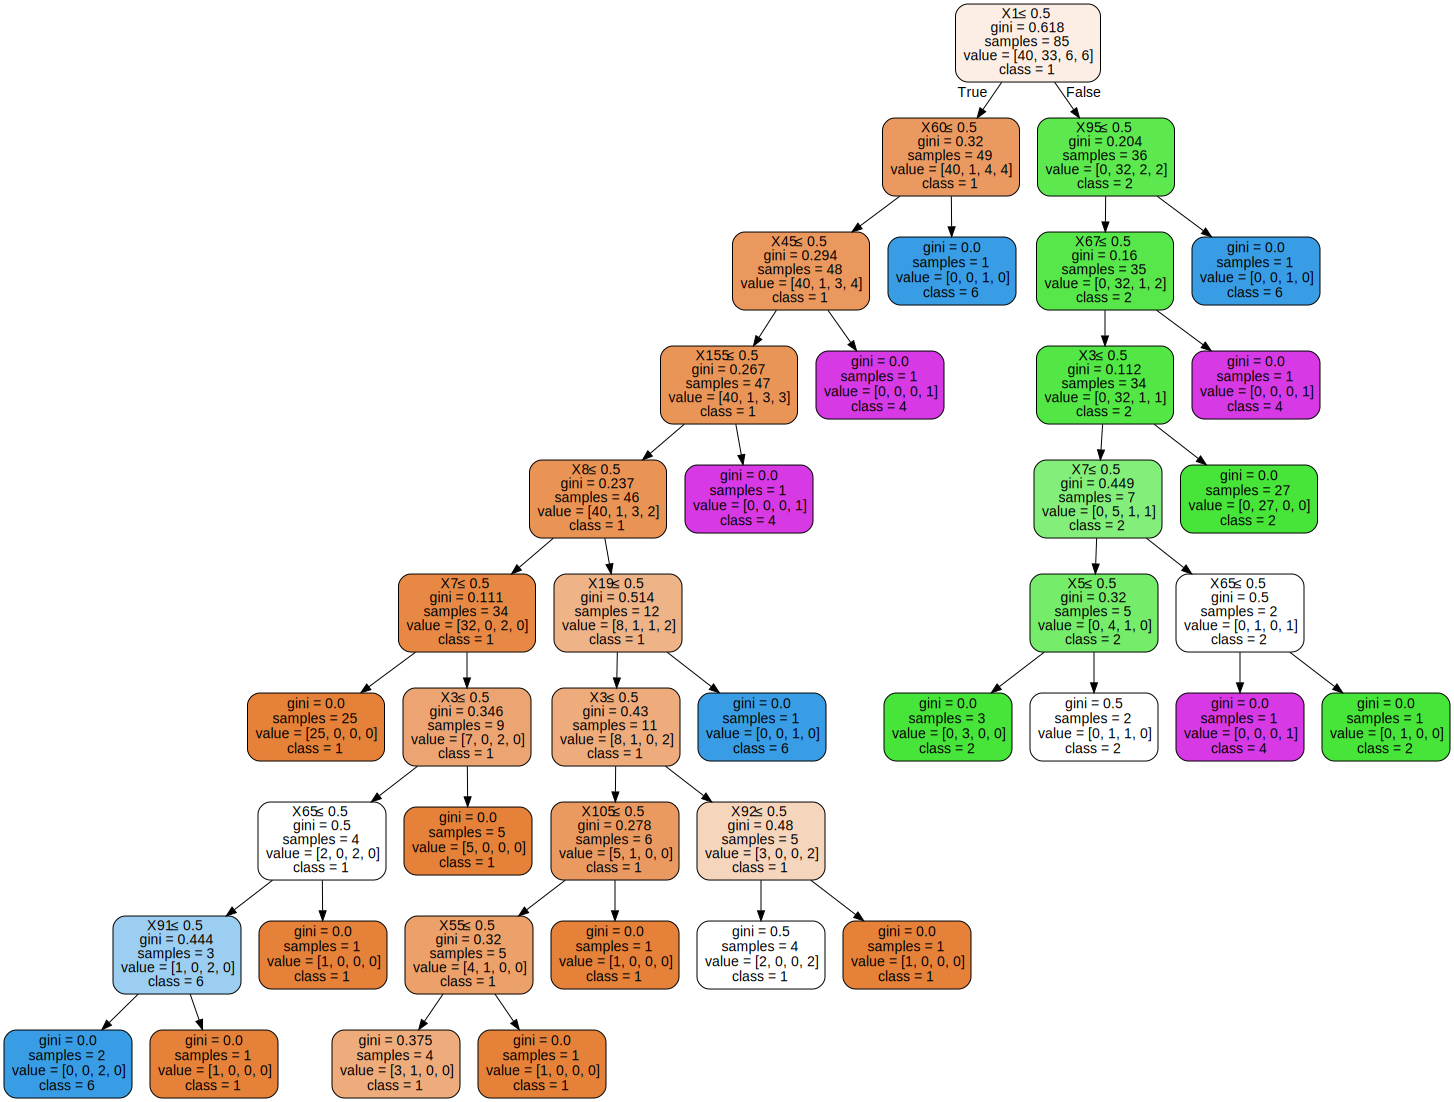

In [50]:
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                  feature_names=None,  
                      class_names=targets,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [51]:
clf_dtr = tree.DecisionTreeRegressor(random_state=1, max_depth=None)

In [52]:
X2 = pd.read_csv("interstate.csv")
y2 = X2.pop("combat_fatalities").values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, random_state=1)
featureSet2 = ['side', 'initiation','combat_location','outcome']
X_train_sf2 = X_train2[featureSet2].copy()
X_test_sf2 = X_test2[featureSet2].copy()
ohe.fit(X_train_sf2)
X_train_sf_encoded2 = ohe.transform(X_train_sf2)
X_test_sf_encoded2 = ohe.transform(X_test_sf2)

In [53]:
clf_dtr_scores = train_model(clf_dtr, X_train_sf_encoded2, y_train2)
print(clf_dtr_scores)

Starting training...
Epoch:1/1 -- 2019-12-02 21:57:25.535690
Done training.
[0.9728588265790242]


In [61]:
y_predicted2 = clf_dtr.predict(X_train_sf_encoded2[0:10])
print(y_predicted2)
print(y_train2[0:10])

[4.47225000e+04 7.00000000e+03 1.20000000e+06 3.74613846e+04
 6.24800000e+02 8.75000000e+03 8.30945000e+04 7.13500000e+02
 3.74613846e+04 2.55000000e+02]
[  8000    100 152000 210824 405400 126875  10000    140  70000  10000]


Starting training...
Epoch:1/1 -- 2019-12-02 21:57:25.680328
Done training.
[0.8694522521258465]


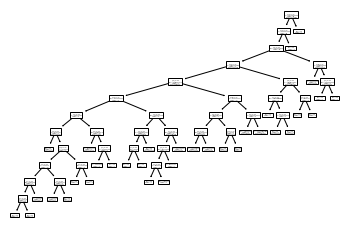

In [55]:
tree.plot_tree(clf_dtr.fit(X_test_sf_encoded2, y_test2))
clf_dtr_test_scores = train_model(clf_dtr, X_test_sf_encoded2, y_test2)
print(clf_dtr_test_scores)

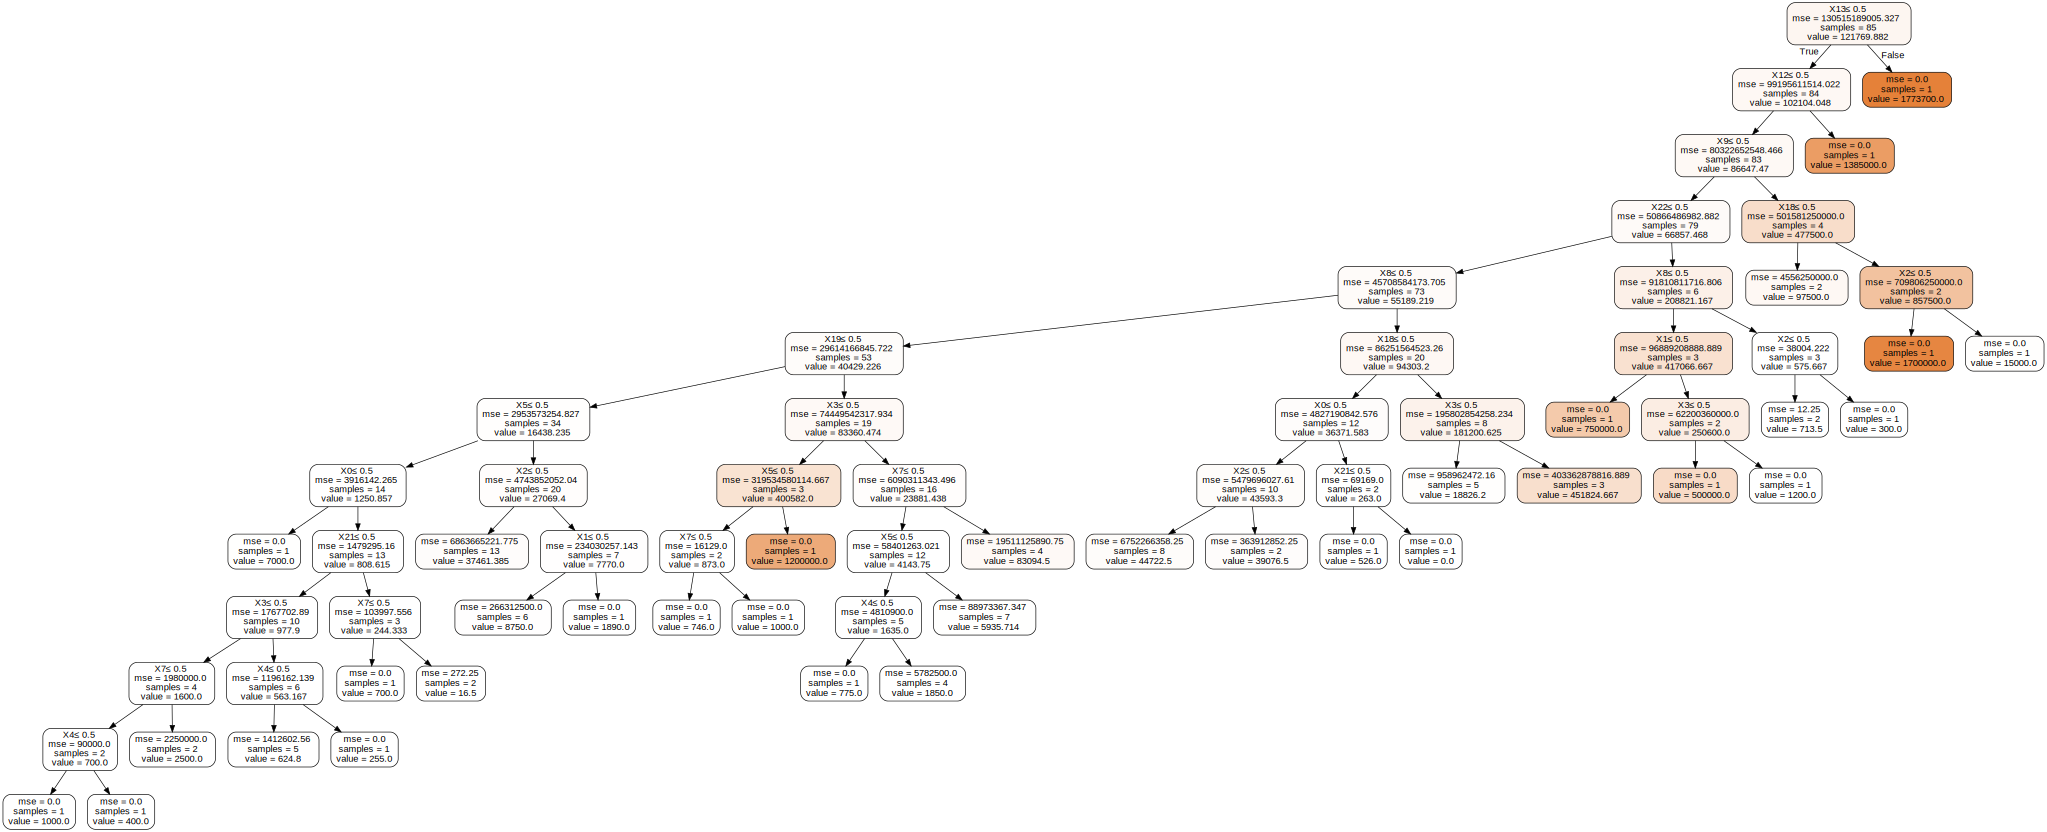

In [56]:
dot_data2 = tree.export_graphviz(clf_dtr, out_file=None, 
                  feature_names=None,  
                      class_names=None,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph2 = graphviz.Source(dot_data2)  
graph2 